In [1]:
from collections import defaultdict, Counter
from workflow.gunc.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from workflow.external.gtdb_metadata import GtdbMetadataR207

In [2]:
DF_META = GtdbMetadataR207().output().read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [3]:
DF_MAX_CSS = AggregateMaxCssLevelMerged().output().read_cached()
print(DF_MAX_CSS.shape)
DF_MAX_CSS.head()

(35723, 13)


,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [4]:
DF = DF_META.merge(DF_MAX_CSS, left_index=True, right_index=True, how='left')
DF.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
D_RANK = {'d': 'domain',
          'k': 'kingdom',
          'p': 'phylum',
          'c': 'class',
          'o': 'order',
          'f': 'family',
          'g': 'genus',
          's': 'species',
          'st': 'strain'}

In [6]:


def get_taxonomic_novelty(filter_pass=None):

    # Get the number of taxa contained within each rank
    d_tax_under = defaultdict(lambda: 0)
    for taxonomy in DF['gtdb_taxonomy'].values:
        for rank in taxonomy.split(';'):
            d_tax_under[rank] += 1

    # Find the novelty
    if filter_pass is not None:
        n_total = len(DF[DF['pass.GUNC'] == filter_pass])
    else:
        n_total = len(DF)

    # Process the rows
    tax_novelty = list()
    for gid, (tax_str, pass_gunc) in DF[['gtdb_taxonomy', 'pass.GUNC']].iterrows():
        if filter_pass is not None and pass_gunc != filter_pass:
            continue
        taxonomy = tax_str.split(';')
        last_rank = 'st'
        for taxon in reversed(taxonomy):
            taxon_count = d_tax_under[taxon]
            if taxon_count > 1:
                break
            last_rank = taxon[0]
        tax_novelty.append(D_RANK[last_rank])
    d_tax_novelty_count = Counter(tax_novelty)
    order = ('ph', 'cl', 'or', 'fa', 'ge', 'sp', 'st')
    d_tax_novelty_count = {k: v for k, v in sorted(d_tax_novelty_count.items(), key=lambda x: order.index(x[0][0:2]))}

    print(f'Highest taxonomic novelty (filtering on {filter_pass})')
    [print(f'\t{k} = {v:,}\t({v / n_total:.2%})') for k, v in d_tax_novelty_count.items()]
    print(f'\tTOTAL = {sum(d_tax_novelty_count.values()):,}')
    print(f'Number of pass.GUNC={filter_pass} ({n_total:,})')
    print()
    return d_tax_novelty_count

d_novelty_all = get_taxonomic_novelty(filter_pass=None)
d_novelty_fail = get_taxonomic_novelty(filter_pass=False)

Highest taxonomic novelty (filtering on None)
	phylum = 20	(0.01%)
	class = 47	(0.01%)
	order = 263	(0.08%)
	family = 814	(0.26%)
	genus = 5,977	(1.88%)
	species = 36,047	(11.35%)
	strain = 274,374	(86.41%)
	TOTAL = 317,542
Number of pass.GUNC=None (317,542)

Highest taxonomic novelty (filtering on False)
	class = 1	(0.00%)
	order = 7	(0.02%)
	family = 34	(0.10%)
	genus = 454	(1.27%)
	species = 3,009	(8.42%)
	strain = 32,218	(90.19%)
	TOTAL = 35,723
Number of pass.GUNC=False (35,723)



       Rank         Origin  % of genomes in source
0    phylum  All GTDB R207                0.006298
1    phylum   Contaminated                0.000000
2     class  All GTDB R207                0.014801
3     class   Contaminated                0.002799
4     order  All GTDB R207                0.082824
5     order   Contaminated                0.019595
6    family  All GTDB R207                0.256344
7    family   Contaminated                0.095177
8     genus  All GTDB R207                1.882271
9     genus   Contaminated                1.270890
10  species  All GTDB R207               11.351884
11  species   Contaminated                8.423145
12   strain  All GTDB R207               86.405578
13   strain   Contaminated               90.188394


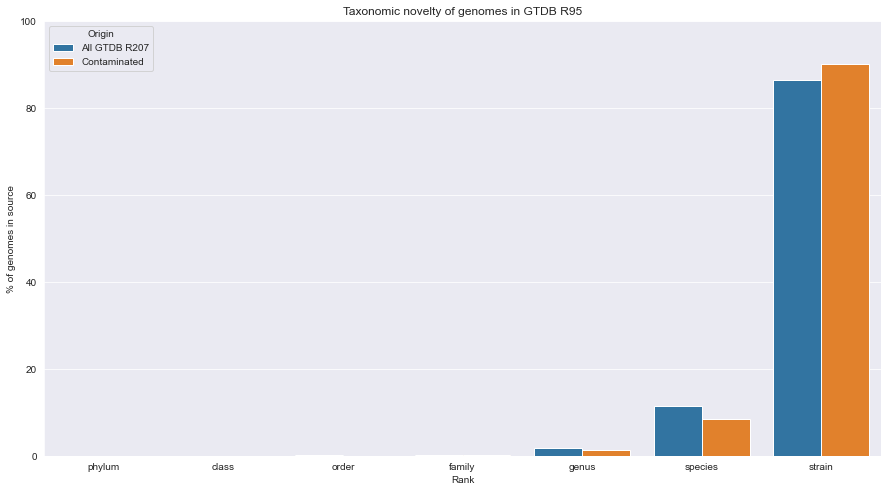

In [7]:
def do_plot():

    x_label = 'Rank'
    y_label = '% of genomes in source'
    source_label = 'Origin'

    rows = list()
    for rank in D_RANK.values():
        cnt_gtdb = d_novelty_all.get(rank, 0)
        cnt_fail = d_novelty_fail.get(rank, 0)

        if cnt_fail == 0 and cnt_gtdb == 0:
            continue

        rows.append({
            x_label: rank,
            source_label: 'All GTDB R207',
            y_label: 100 * cnt_gtdb / 317542
        })
        rows.append({
            x_label: rank,
            source_label: 'Contaminated',
            y_label: 100 * cnt_fail / 35723
        })

    df = pd.DataFrame(rows)

    x_vals = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'Strain']

    keys = ['phylum', 'class', 'order', 'family', 'genus', 'species', 'strain']
    y_all = [d_novelty_all.get(x, 0) for x in keys]
    y_fail = [d_novelty_fail.get(x, 0) for x in keys]

    import matplotlib.pyplot as plt
    plt.rcParams.update({'font.size': 22})

    fig, ax = plt.subplots(figsize=(15, 8))
    sns.barplot(data=df, x=x_label, y=y_label, hue=source_label,ax=ax)

    ax.set_ylim([0, 100])

    plt.title('Taxonomic novelty of genomes in GTDB R95')


    print(df)

do_plot()